In [1]:
import glob, os
import pathlib
import json
import yaml

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from pprint import pprint

%matplotlib inline

In [2]:
# avoid the module's method call deprecation
try:
    collectionsAbc = collections.abc
except AttributeError:
    collectionsAbc = collections

Configuring Juputer's options to present more things to the output.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Functions to use

## Function to fully flatten each json file

In [4]:
def flatten_dict_full(d, sep="_"):
    obj = collections.OrderedDict()

    def recurse(t, parent_key=""):
        
        if isinstance(t, list):
            for i in range(len(t)):
                recurse(t[i], parent_key + sep + str(i) if parent_key else str(i))
        elif isinstance(t,dict):
            for k, v in t.items():
                recurse(v, parent_key + sep + k if parent_key else k)
        else:
            obj[parent_key] = t
    recurse(d)

    return obj

# Load Data GroundTruth

## Path declaration

In [5]:
path_obj = pathlib.Path().absolute()

In [6]:
path_app = path_obj.as_posix()
# print('Current path:', path_app)
print('Type:', type(path_app))

Type: <class 'str'>


In [7]:
path_app = os.path.abspath(os.getcwd())
# path = os.path.join(path, 'danceability', 'features', 'mp3')
# print('Current path:', path_app)
print('Type:', type(path_app))

Type: <class 'str'>


## Count all the JSON data included in files

In [8]:
counter = 0
for root, dirs, files in os.walk(path_app):
    for file in files:
        if(file.endswith(".json")):
#             print(os.path.join(root,file))
            counter += 1
            
print('counted json files:', counter)  

counted json files: 10461


## Load the GroundTruth file

In [9]:
with open(os.path.join(path_app, 'acousticbrainz-datasets/danceability/metadata/groundtruth.yaml'), 'r') as stream:
    try:
        groundTr_data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [10]:
# pprint(groundTr_data)

In [11]:
# pprint(groundTr_data['groundTruth'])

In [12]:
len(groundTr_data['groundTruth'].keys())

225

## Check the unique folders with tracks and sort them alphabetically

In [13]:
labeled_tracks = groundTr_data['groundTruth']

### Split the keys in Folder - Track Name

In [14]:
folders = []
for key in labeled_tracks:
    key = key.split('/')
    folders.append(key[0])

In [15]:
print(folders[:15])

['Alternative', 'Alternative', 'Alternative', 'Alternative', 'Alternative', 'Alternative', 'Alternative', 'Alternative', 'Alternative', 'Blues', 'Blues', 'Blues', 'Blues', 'Blues', 'Blues']


### Check the folders

In [16]:
folders = set(folders)
folders = list(folders)
folders.sort()
folders

['Alternative',
 'Blues',
 'Classical',
 'Country',
 'Dance and House',
 'Folk and New Age',
 'Hip-Hop and Rap',
 'House & Garage and Grime',
 'Jazz',
 'Jungle and D&B',
 'Latin',
 'Pop',
 'R&B and Soul',
 'Reggae',
 'Rock and Metal',
 'Techno and Electro',
 'Vocal and Acapella']

## Class Name retrieved from GT file

In [17]:
class_name = groundTr_data['className']

In [18]:
class_name

'danceability'

## Load a DF containing the tracks from the features path and the info retrieved from the GT file

In [19]:
path_features = os.path.join(path_app, 'acousticbrainz-datasets/danceability', 'features', 'mp3')

In [20]:
# path_features

In [21]:
tracks = []
for key, value in labeled_tracks.items():
    track_dict = {}
    key = key.split('/')
    path_tracks = os.path.join(path_features, key[0])
    for f_name in os.listdir(path_tracks):
        if f_name.startswith(key[1]):
            track_dict['genre_category'] = key[0]
            track_dict['track'] = key[1]
            track_dict['track_path'] = os.path.join(path_features, key[0], f_name)
            track_dict['danceability'] = value
    tracks.append(track_dict)

In [22]:
# pprint(tracks)

In [23]:
len(tracks)

225

DF that includes the tracks

In [24]:
df_tracks = pd.DataFrame(data=tracks)

Plot the track's paths

In [25]:
df_tracks.head()

,genre_category,track,track_path,danceability
0,Alternative,02 Happy Birthday - Altered Images.mp3,/Users/pantelistzamalis/Desktop/google2020/gsoc_ml_infrastructure/acousticbrainz-datasets/danceability/features/mp3/Alternative/02 Happy Birthday - Altered Images.mp3.json,danceable
1,Alternative,03 How Soon Is Now - Smiths.mp3,/Users/pantelistzamalis/Desktop/google2020/gsoc_ml_infrastructure/acousticbrainz-datasets/danceability/features/mp3/Alternative/03 How Soon Is Now - Smiths.mp3.json,not_danceable
2,Alternative,04 Pearly Dewdrops' Drops - Cocteau Twins.mp3,/Users/pantelistzamalis/Desktop/google2020/gsoc_ml_infrastructure/acousticbrainz-datasets/danceability/features/mp3/Alternative/04 Pearly Dewdrops' Drops - Cocteau Twins.mp3.json,not_danceable
3,Alternative,06 Mr Brightside - Killers.mp3,/Users/pantelistzamalis/Desktop/google2020/gsoc_ml_infrastructure/acousticbrainz-datasets/danceability/features/mp3/Alternative/06 Mr Brightside - Killers.mp3.json,danceable
4,Alternative,06 Song 2 - Blur.mp3,/Users/pantelistzamalis/Desktop/google2020/gsoc_ml_infrastructure/acousticbrainz-datasets/danceability/features/mp3/Alternative/06 Song 2 - Blur.mp3.json,danceable


Check the className distribution of the data based on the 'genre_category'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a170dc910>,
      dtype=object)

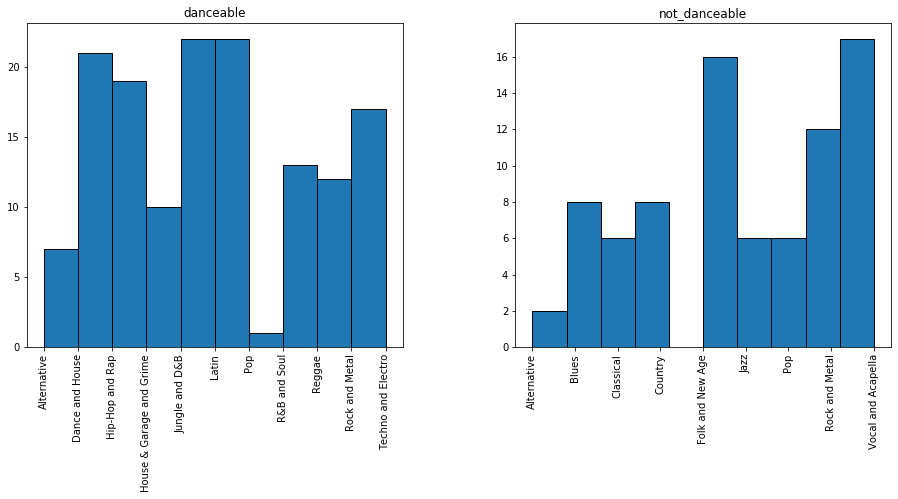

In [26]:
df_tracks.hist('genre_category', class_name, figsize=(15,6), edgecolor="k")

Data distribution based on the genres

In [27]:
df_tracks['genre_category'].value_counts()

Latin                       22
Jungle and D&B              22
Dance and House             21
Hip-Hop and Rap             19
Vocal and Acapella          17
Folk and New Age            16
Techno and Electro          16
R&B and Soul                13
Rock and Metal              13
Reggae                      12
House & Garage and Grime    10
Alternative                  9
Blues                        8
Country                      8
Pop                          7
Jazz                         6
Classical                    6
Name: genre_category, dtype: int64

# Load a Single JSON low-level file and explore its data

In [28]:
with open(df_tracks['track_path'].iloc[0]) as json_file:
    data_feats = json.load(json_file)

In [29]:
# pprint(data_feats)

In [30]:
data_feats.keys()

dict_keys(['lowlevel', 'metadata', 'rhythm', 'tonal'])

## metadata key's parts

In [31]:
data_feats['metadata']

{'audio_properties': {'analysis_sample_rate': 44100,
  'bit_rate': 128000,
  'equal_loudness': 0,
  'length': 178.259597778,
  'lossless': 0,
  'replay_gain': -15.0935020447,
  'sample_rate': 44100,
  'codec': 'mp3',
  'downmix': 'mix',
  'md5_encoded': '9a09eb0c8b468e32c61ab36080f0f5f0'},
 'tags': {'file_name': '02 Happy Birthday - Altered Images.mp3',
  'album': ['John Peel - A Tribute [UK] Disc 2'],
  'albumartist': ['Various Artists'],
  'artist': ['Various Artists'],
  'date': ['2005'],
  'genre': ['Rock/Pop'],
  'label': ['WSM'],
  'length': ['178320'],
  'title': ['Happy Birthday - Altered Images'],
  'tracknumber': ['2']},
 'version': {'essentia': '2.1-beta2',
  'essentia_git_sha': 'v2.1_beta2',
  'extractor': 'music 1.0'}}

In [32]:
data_feats['metadata'].keys()

dict_keys(['audio_properties', 'tags', 'version'])

## tonal

Based on the Gaia's classification configuration file (yaml), these are the features that will be enumerated.
- Enumeration in: 'tonal.chords_key', 'tonal.chords_scale', 'tonal.key_key', 'tonal.key_scale'

In [33]:
# data_feats['tonal']

In [34]:
enum_keys = ['chords_key', 'chords_scale', 'key_key', 'key_scale']
for item in enum_keys:
    if item in list(data_feats['tonal'].keys()):
        print('{}: {}'.format(item, data_feats['tonal'][item]))

chords_key: A
chords_scale: major
key_key: D
key_scale: minor


In [35]:
data_feats['tonal'].keys()

dict_keys(['chords_changes_rate', 'chords_number_rate', 'chords_strength', 'hpcp_entropy', 'key_strength', 'tuning_diatonic_strength', 'tuning_equal_tempered_deviation', 'tuning_frequency', 'tuning_nontempered_energy_ratio', 'hpcp', 'chords_histogram', 'thpcp', 'chords_key', 'chords_scale', 'key_key', 'key_scale'])

## low-level

In [36]:
low_level = data_feats['lowlevel']

In [37]:
low_level.keys()

dict_keys(['average_loudness', 'barkbands_crest', 'barkbands_flatness_db', 'barkbands_kurtosis', 'barkbands_skewness', 'barkbands_spread', 'dissonance', 'dynamic_complexity', 'erbbands_crest', 'erbbands_flatness_db', 'erbbands_kurtosis', 'erbbands_skewness', 'erbbands_spread', 'hfc', 'melbands_crest', 'melbands_flatness_db', 'melbands_kurtosis', 'melbands_skewness', 'melbands_spread', 'pitch_salience', 'silence_rate_20dB', 'silence_rate_30dB', 'silence_rate_60dB', 'spectral_centroid', 'spectral_complexity', 'spectral_decrease', 'spectral_energy', 'spectral_energyband_high', 'spectral_energyband_low', 'spectral_energyband_middle_high', 'spectral_energyband_middle_low', 'spectral_entropy', 'spectral_flux', 'spectral_kurtosis', 'spectral_rms', 'spectral_rolloff', 'spectral_skewness', 'spectral_spread', 'spectral_strongpeak', 'zerocrossingrate', 'barkbands', 'erbbands', 'gfcc', 'melbands', 'mfcc', 'spectral_contrast_coeffs', 'spectral_contrast_valleys'])

## rhythm

In [38]:
rhythm = data_feats['rhythm']

In [39]:
rhythm.keys()

dict_keys(['beats_count', 'beats_loudness', 'bpm', 'bpm_histogram_first_peak_bpm', 'bpm_histogram_first_peak_spread', 'bpm_histogram_first_peak_weight', 'bpm_histogram_second_peak_bpm', 'bpm_histogram_second_peak_spread', 'bpm_histogram_second_peak_weight', 'danceability', 'onset_rate', 'beats_loudness_band_ratio', 'beats_position'])

In [40]:
# pprint(rhythm)

## Remove the `metadata` key and the `rhythm.beats_position` 

In [41]:
data_feats.keys()

dict_keys(['lowlevel', 'metadata', 'rhythm', 'tonal'])

Delete `metadata`

In [42]:
if 'metadata' in data_feats:
    del data_feats['metadata']

In [43]:
data_feats.keys()

dict_keys(['lowlevel', 'rhythm', 'tonal'])

Delete `rhythm.beats_position`

In [44]:
print(data_feats['rhythm'].keys())
print()
print('length:', len(list(data_feats['rhythm'].keys())))

dict_keys(['beats_count', 'beats_loudness', 'bpm', 'bpm_histogram_first_peak_bpm', 'bpm_histogram_first_peak_spread', 'bpm_histogram_first_peak_weight', 'bpm_histogram_second_peak_bpm', 'bpm_histogram_second_peak_spread', 'bpm_histogram_second_peak_weight', 'danceability', 'onset_rate', 'beats_loudness_band_ratio', 'beats_position'])

length: 13


In [45]:
if 'beats_position' in data_feats['rhythm']:
    del data_feats['rhythm']['beats_position']

In [46]:
print(data_feats['rhythm'].keys())
print()
print('length:', len(list(data_feats['rhythm'].keys())))

dict_keys(['beats_count', 'beats_loudness', 'bpm', 'bpm_histogram_first_peak_bpm', 'bpm_histogram_first_peak_spread', 'bpm_histogram_first_peak_weight', 'bpm_histogram_second_peak_bpm', 'bpm_histogram_second_peak_spread', 'bpm_histogram_second_peak_weight', 'danceability', 'onset_rate', 'beats_loudness_band_ratio'])

length: 12


## Transform to a single DF

In [47]:
data_feats = flatten_dict_full(data_feats)

In [48]:
len(data_feats.keys())

2651

In [49]:
df_single_track = pd.DataFrame(data_feats, columns=data_feats.keys(), index=[0])

In [50]:
df_single_track

,lowlevel_average_loudness,lowlevel_barkbands_crest_dmean,lowlevel_barkbands_crest_dmean2,lowlevel_barkbands_crest_dvar,lowlevel_barkbands_crest_dvar2,lowlevel_barkbands_crest_max,lowlevel_barkbands_crest_mean,lowlevel_barkbands_crest_median,lowlevel_barkbands_crest_min,lowlevel_barkbands_crest_var,lowlevel_barkbands_flatness_db_dmean,lowlevel_barkbands_flatness_db_dmean2,lowlevel_barkbands_flatness_db_dvar,lowlevel_barkbands_flatness_db_dvar2,lowlevel_barkbands_flatness_db_max,lowlevel_barkbands_flatness_db_mean,lowlevel_barkbands_flatness_db_median,lowlevel_barkbands_flatness_db_min,lowlevel_barkbands_flatness_db_var,lowlevel_barkbands_kurtosis_dmean,lowlevel_barkbands_kurtosis_dmean2,lowlevel_barkbands_kurtosis_dvar,lowlevel_barkbands_kurtosis_dvar2,lowlevel_barkbands_kurtosis_max,lowlevel_barkbands_kurtosis_mean,lowlevel_barkbands_kurtosis_median,lowlevel_barkbands_kurtosis_min,lowlevel_barkbands_kurtosis_var,lowlevel_barkbands_skewness_dmean,lowlevel_barkbands_skewness_dmean2,lowlevel_barkbands_skewness_dvar,lowlevel_barkbands_skewness_dvar2,lowlevel_barkbands_skewness_max,lowlevel_barkbands_skewness_mean,lowlevel_barkbands_skewness_median,lowlevel_barkbands_skewness_min,lowlevel_barkbands_skewness_var,lowlevel_barkbands_spread_dmean,lowlevel_barkbands_spread_dmean2,lowlevel_barkbands_spread_dvar,lowlevel_barkbands_spread_dvar2,lowlevel_barkbands_spread_max,lowlevel_barkbands_spread_mean,lowlevel_barkbands_spread_median,lowlevel_barkbands_spread_min,lowlevel_barkbands_spread_var,lowlevel_dissonance_dmean,lowlevel_dissonance_dmean2,lowlevel_dissonance_dvar,lowlevel_dissonance_dvar2,lowlevel_dissonance_max,lowlevel_dissonance_mean,lowlevel_dissonance_median,lowlevel_dissonance_min,lowlevel_dissonance_var,lowlevel_dynamic_complexity,lowlevel_erbbands_crest_dmean,lowlevel_erbbands_crest_dmean2,lowlevel_erbbands_crest_dvar,lowlevel_erbbands_crest_dvar2,lowlevel_erbbands_crest_max,lowlevel_erbbands_crest_mean,lowlevel_erbbands_crest_median,lowlevel_erbbands_crest_min,lowlevel_erbbands_crest_var,lowlevel_erbbands_flatness_db_dmean,lowlevel_erbbands_flatness_db_dmean2,lowlevel_erbbands_flatness_db_dvar,lowlevel_erbbands_flatness_db_dvar2,lowlevel_erbbands_flatness_db_max,lowlevel_erbbands_flatness_db_mean,lowlevel_erbbands_flatness_db_median,lowlevel_erbbands_flatness_db_min,lowlevel_erbbands_flatness_db_var,lowlevel_erbbands_kurtosis_dmean,lowlevel_erbbands_kurtosis_dmean2,lowlevel_erbbands_kurtosis_dvar,lowlevel_erbbands_kurtosis_dvar2,lowlevel_erbbands_kurtosis_max,lowlevel_erbbands_kurtosis_mean,lowlevel_erbbands_kurtosis_median,lowlevel_erbbands_kurtosis_min,lowlevel_erbbands_kurtosis_var,lowlevel_erbbands_skewness_dmean,lowlevel_erbbands_skewness_dmean2,lowlevel_erbbands_skewness_dvar,lowlevel_erbbands_skewness_dvar2,lowlevel_erbbands_skewness_max,lowlevel_erbbands_skewness_mean,lowlevel_erbbands_skewness_median,lowlevel_erbbands_skewness_min,lowlevel_erbbands_skewness_var,lowlevel_erbbands_spread_dmean,lowlevel_erbbands_spread_dmean2,lowlevel_erbbands_spread_dvar,lowlevel_erbbands_spread_dvar2,lowlevel_erbbands_spread_max,lowlevel_erbbands_spread_mean,lowlevel_erbbands_spread_median,lowlevel_erbbands_spread_min,lowlevel_erbbands_spread_var,lowlevel_hfc_dmean,lowlevel_hfc_dmean2,lowlevel_hfc_dvar,lowlevel_hfc_dvar2,lowlevel_hfc_max,lowlevel_hfc_mean,lowlevel_hfc_median,lowlevel_hfc_min,lowlevel_hfc_var,lowlevel_melbands_crest_dmean,lowlevel_melbands_crest_dmean2,lowlevel_melbands_crest_dvar,lowlevel_melbands_crest_dvar2,lowlevel_melbands_crest_max,lowlevel_melbands_crest_mean,lowlevel_melbands_crest_median,lowlevel_melbands_crest_min,lowlevel_melbands_crest_var,lowlevel_melbands_flatness_db_dmean,lowlevel_melbands_flatness_db_dmean2,lowlevel_melbands_flatness_db_dvar,lowlevel_melbands_flatness_db_dvar2,lowlevel_melbands_flatness_db_max,lowlevel_melbands_flatness_db_mean,lowlevel_melbands_flatness_db_median,lowlevel_melbands_flatness_db_min,lowlevel_melbands_flatness_db_var,lowlevel_melbands_kurtosis_dmean,lowlevel_melbands_

In [51]:
df_single_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Columns: 2651 entries, lowlevel_average_loudness to tonal_key_scale
dtypes: float64(2492), int64(155), object(4)
memory usage: 20.7+ KB
